# The Sparks Foundation

# Data Science and Business Analytics intern (July-2022)

# Aurthor : Vinay Khatate

# Task_1 : PREDICTION USING SUPERVISED ML


In [2]:
# Importing all required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [3]:
# Reading the data

url='http://bit.ly/w-data'
df=pd.read_csv(url)
df.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# Checking for null values
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

#### In given dataset there are no null values present

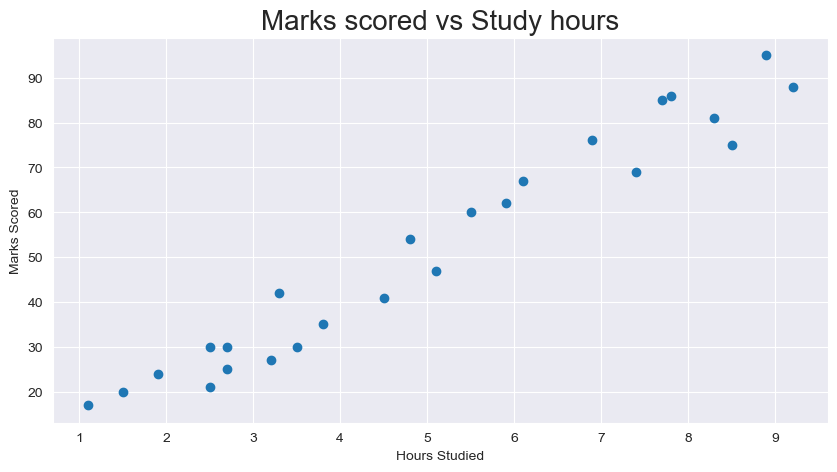

In [5]:
plt.figure(figsize=(10,5))
sns.set_style('darkgrid')
plt.scatter(x=df['Hours'],y=df['Scores'])
plt.title('Marks scored vs Study hours',size=20)
plt.xlabel('Hours Studied',size=10)
plt.ylabel('Marks Scored',size=10)
plt.show()


#### From the above graph it indicates that there exist a correlation between hours studied and marks scored .

### To confirm above lets plot regression line .

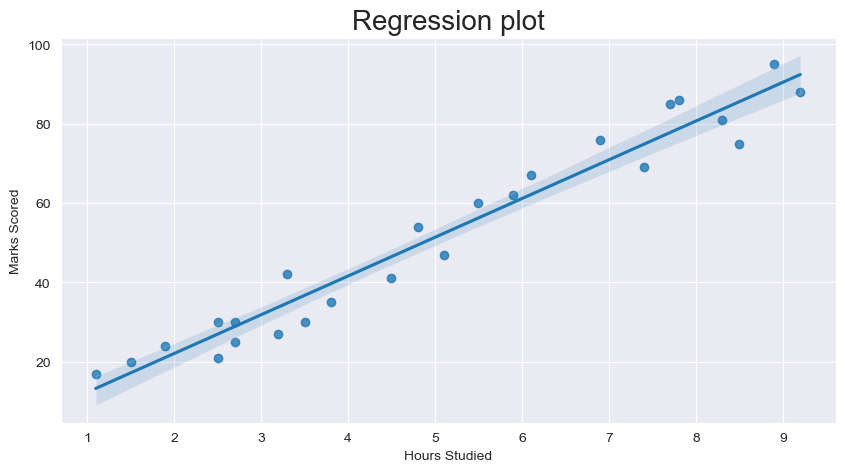

In [7]:
fig=plt.figure(figsize=(10,5))
sns.regplot(x='Hours',y='Scores',data=df)
plt.title('Regression plot',size=20)
plt.xlabel('Hours Studied',size=10)
plt.ylabel('Marks Scored',size=10)
plt.show()


In [8]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


#### It is confirmed that the variables are positively correlated.

### TRAINING MODEL

In [9]:
# Splitting the data
x=df.drop(columns=['Scores'])
y=df['Scores']

In [10]:
# Splitting the model into train and test sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25)


In [11]:
# Training the model
linear=LinearRegression()
linear.fit(x_train,y_train)
predictions=linear.predict(x_test)
print('Training completed')

Training completed


In [12]:
# Testing model
predict=linear.predict(x_test)
prediction=pd.DataFrame({'Hours':x_test['Hours'],'Predicted Marks':predict})
prediction


,Hours,Predicted Marks
19,7.4,75.779774
0,2.5,26.282888
20,2.7,28.303169
5,1.5,16.181483
16,2.5,26.282888
18,6.1,62.647947
6,9.2,93.962303


In [13]:
# Comparing it with actual marks
compare=pd.DataFrame({'Hours':x_test['Hours'],'Actual Marks':y_test, 'Predictied Marks':predict})
compare



,Hours,Actual Marks,Predictied Marks
19,7.4,69,75.779774
0,2.5,21,26.282888
20,2.7,30,28.303169
5,1.5,20,16.181483
16,2.5,30,26.282888
18,6.1,67,62.647947
6,9.2,88,93.962303


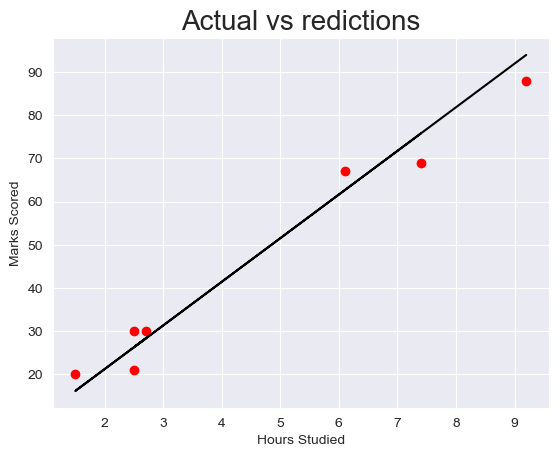

In [14]:
plt.scatter(x=x_test, y=y_test,color='Red')
plt.plot(x_test,predict,color='Black')
plt.title('Actual vs redictions',size=20)
plt.xlabel('Hours Studied', size=10)
plt.ylabel('Marks Scored', size=10)
plt.show()



### EVALUATING MODEL


In [15]:
print('Mean error is:',mean_absolute_error(y_test,predict))


Mean error is: 4.515639514866467


#### Small values of mean absolute error indicates that the chance of error or incorrect forcasting through the model is very less 

### To find predicted score of a student who have studied for 9.25 hours/day

In [16]:
hou=[9.25]
ans=linear.predict([hou])
print('Score is', ans[0])

Score is 94.46737301623388


C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### According to regression model if student have studied for 9.25 hours/day then student is likely to score 94.66 marks